<a href="https://colab.research.google.com/github/17092003vamsi/guner/blob/main/Trail_11_pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.6 MB/s eta 0:00:00
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6762 - loss: 0.8635 - val_accuracy: 0.9839 - val_loss: 0.3847
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9533 - loss: 0.2673 - val_accuracy: 0.9677 - val_loss: 0.1555
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9898 - loss: 0.0985 - val_accuracy: 0.9839 - val_loss: 0.0967
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.9906 - loss: 0.0448 - val_accuracy: 1.0000 - val_loss: 0.0412
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0258


/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


Class 0:


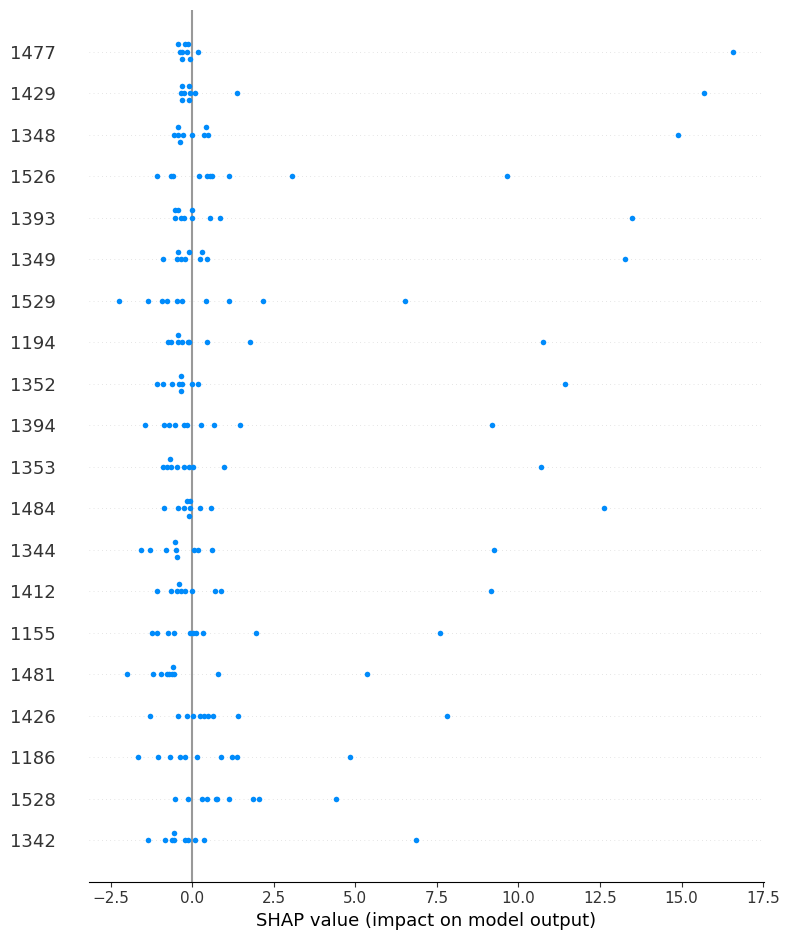

Class 1:


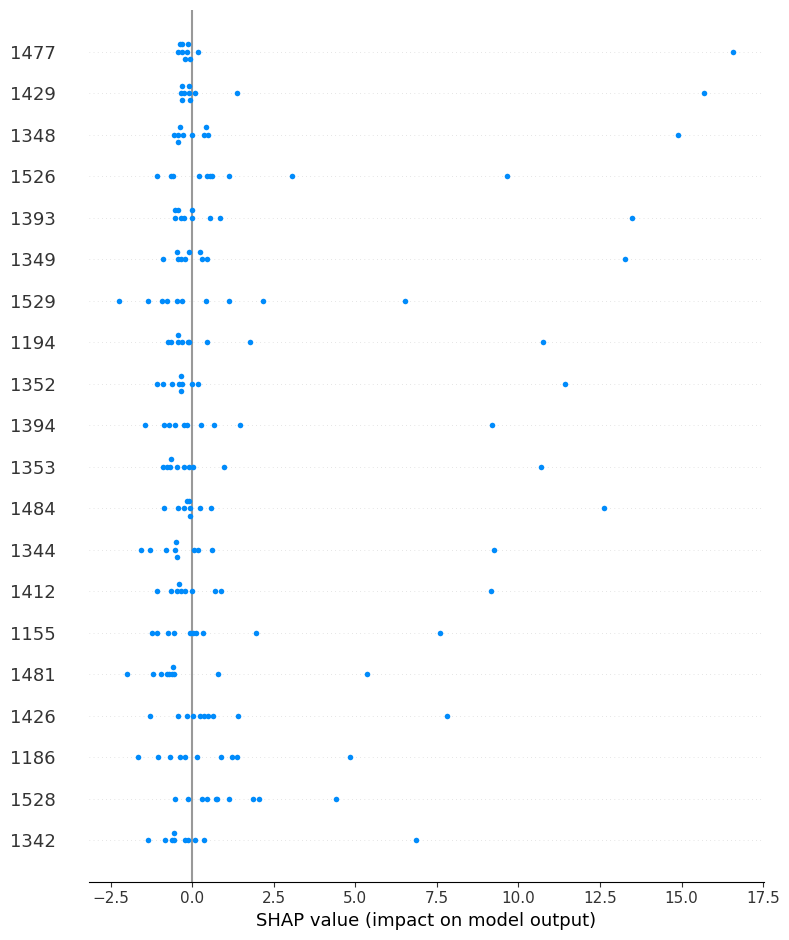

Class 2:


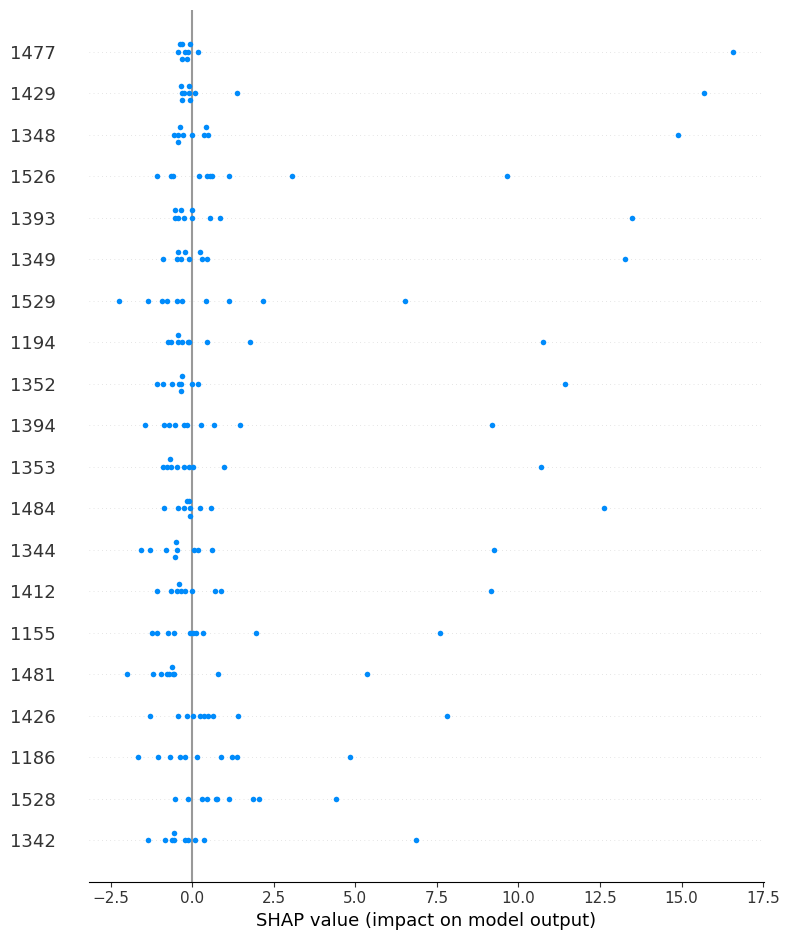

Class 3:


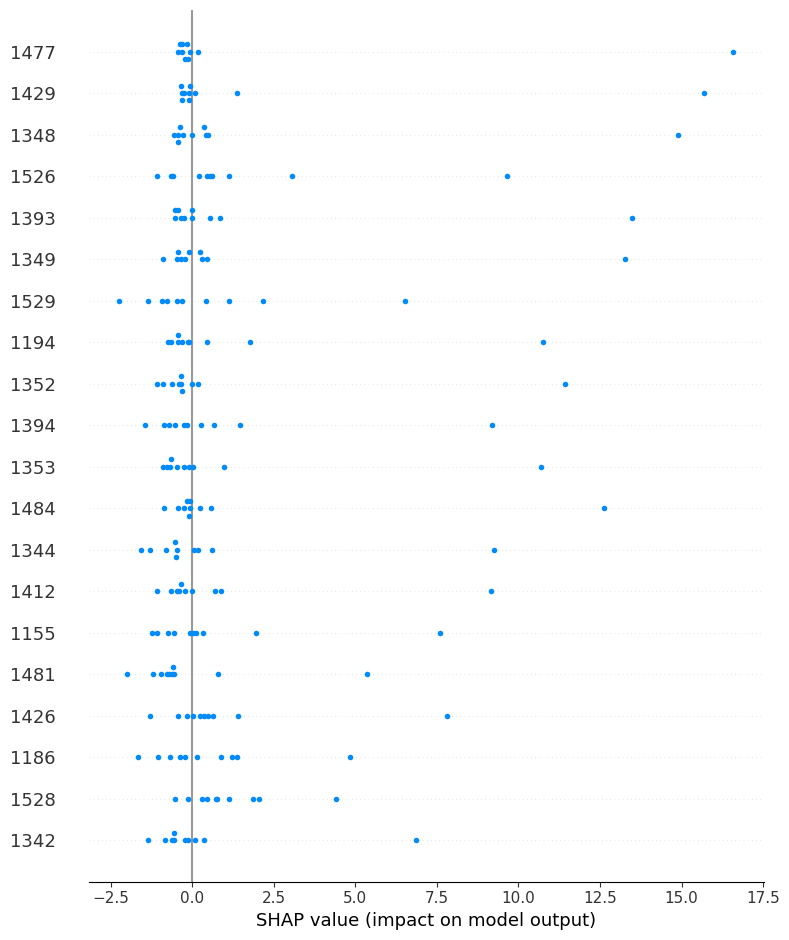

Class 4:


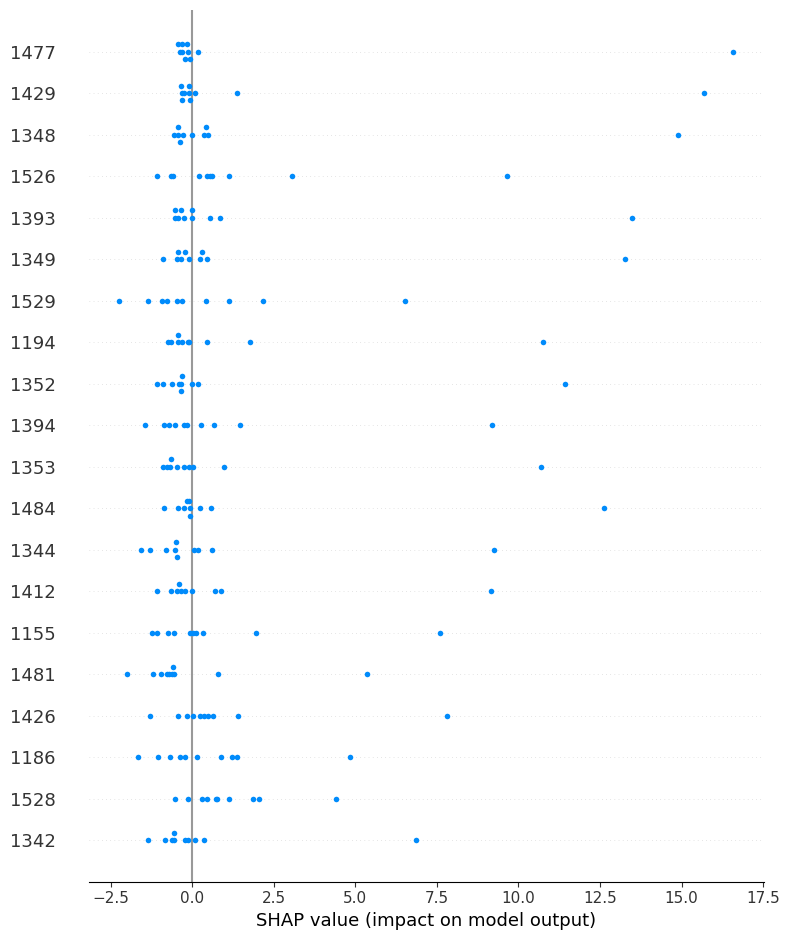

Class 5:


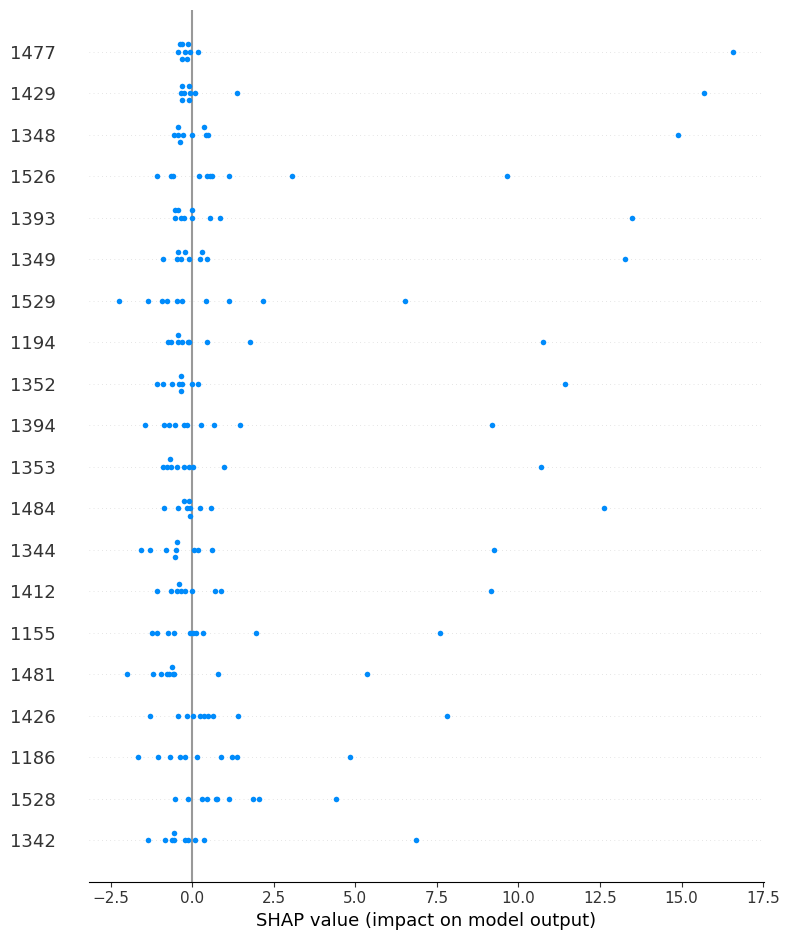

Class 6:


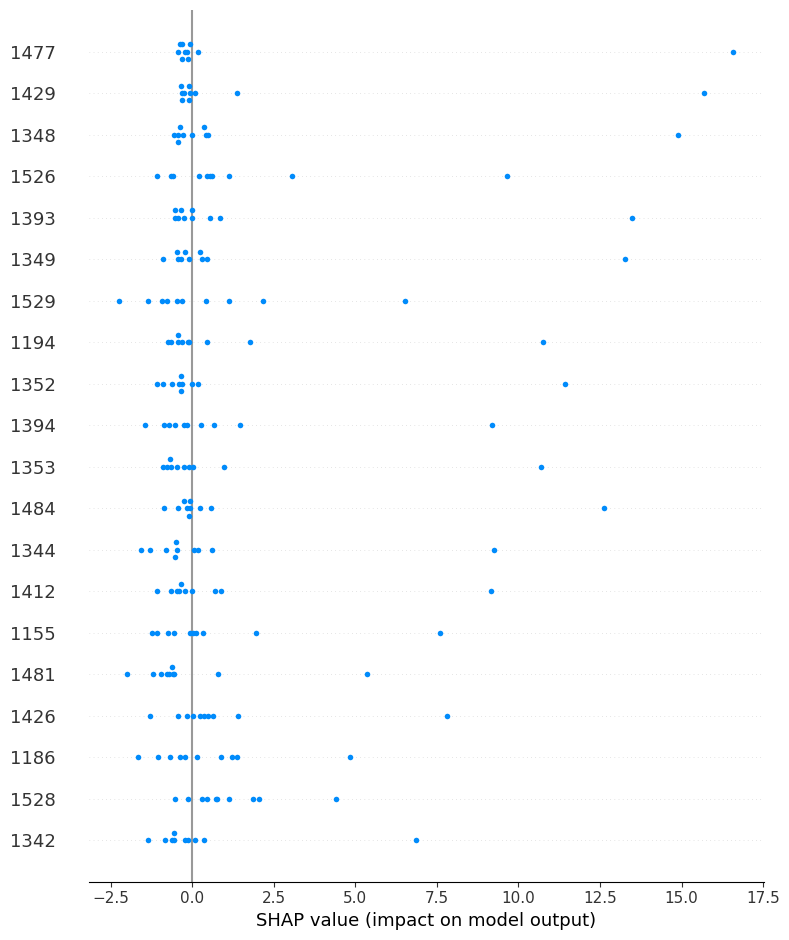

Class 7:


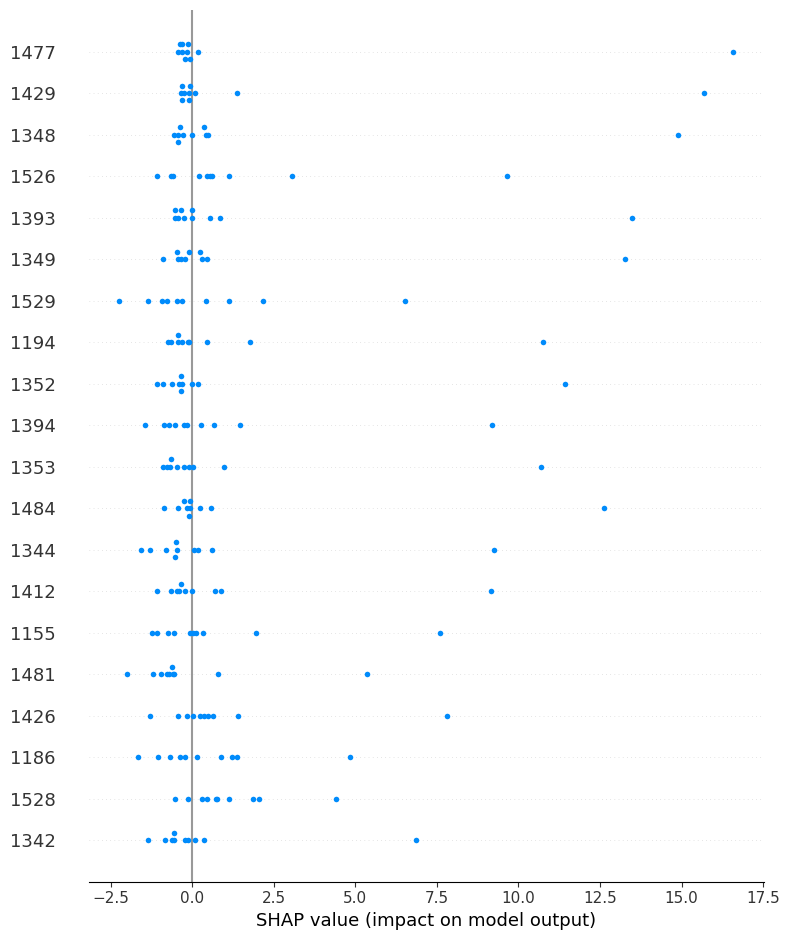

Class 8:


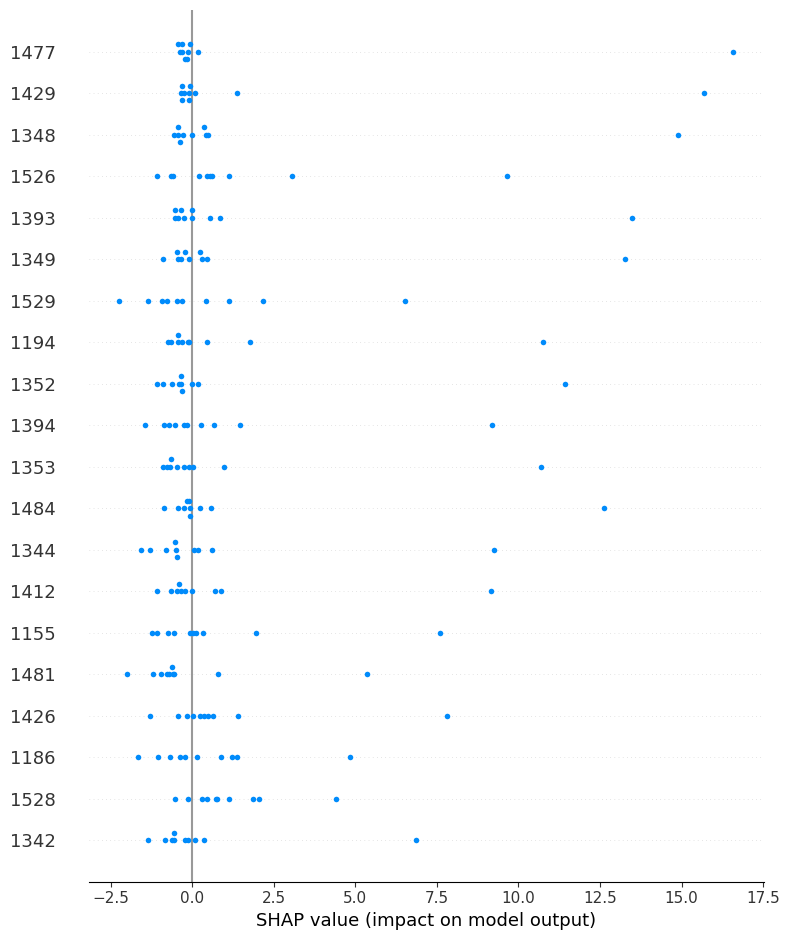

Class 9:


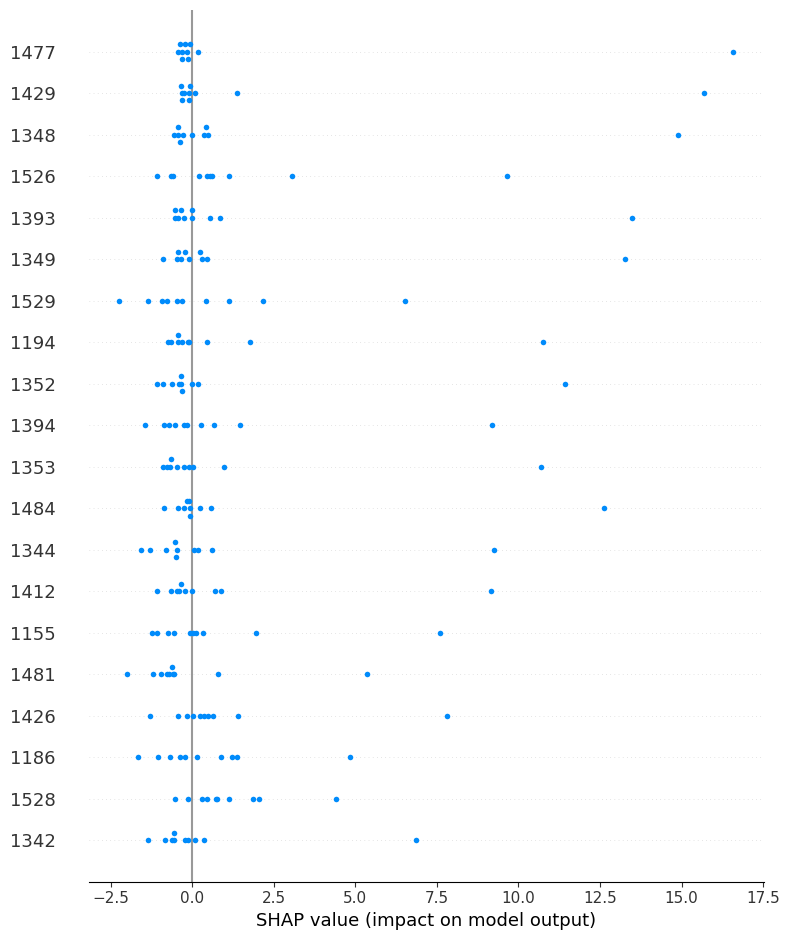

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
!pip install shap
import shap
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/content/COMPLETE DATA SET 2 (1).csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Separate features and labels
X = data.drop(columns=['Type', 'Label'])
y = data['Label']

# Convert labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for CNN (assuming 1D convolution)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Define a simple CNN model
model = models.Sequential([
    layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(64, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_encoded)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

 # SHAP explanation
explainer = shap.DeepExplainer(model, X_train[:100])  # Use a subset of the data
shap_values = explainer.shap_values(X_test[:10])

# Reshape X_test back to 2D for SHAP
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1])

# Plot SHAP values for each class
for class_idx in range(len(shap_values)):  # Iterate through each class
    print(f"Class {class_idx}:")
    shap.summary_plot(X_test_reshaped[:10], feature_names=X.columns)
